In [1]:
import os
import sys
import import_ipynb
import pandas as pd
import numpy as np
#local lib
sys.path.insert(0, os.path.abspath('../KindScoreModel'))
import KindScore as ks
import SpeechRecognition as sr

importing Jupyter notebook from KindScore.ipynb
importing Jupyter notebook from SpeechRecognition.ipynb
Set minimum energy threshold to 758.1139270379687


### Read data source

In [2]:
df = pd.read_csv("data/dataset/dataReV5.csv")
df

,Vehicle,restaurant,food delivery,Problem,score,work,เวลาในการรออาหาร,ราคาอาหาร
0,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",Promotions,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,1 - 2 ชั่วโมง,10 นาทีขึ้นไป,51-100บาท
1,รถยนต์ส่วนตัว,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",หิว ขี้เกียจเดิน จะทำงาน,ไม่มีอะไรน่ากิน,3.0,2 - 3 ชั่วโมง,6 - 10 นาที,51-100บาท
2,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวราดแกง, ร้านน้ำ,...",เพราะร้านที่อยากกินอยู่ไกล บางทีก็อยู่ในเวลาเร...,ถ้าคิวยาวก็ไม่ซื้อ,8.6,1 - 2 ชั่วโมง,6 - 10 นาที,100-200 บาท
3,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวราดแกง, ร้านน้ำ,...",ขี้เกียจเดินออกไปกินข้างนอก,ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น,7.8,1 - 2 ชั่วโมง,6 - 10 นาที,300-500 บาท
4,รถประจำทาง,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",อยากกินร้านนั้น,ถ้าแถวยาวมากก็จะขี้เกียจรอ,8.0,1 - 2 ชั่วโมง,10 นาทีขึ้นไป,100-200 บาท
...,...,...,...,...,...,...,...,...
64,รถจักรยานยนต์,ร้านอาหารญี่ปุ่น,ไม่ต้องต่อคิวซื้อเอง,ร้านไม่เปิดในช่วงปิดเทอม,5.2,NaN,10-20 นาที,40-80บาท
65,รถยนต์ส่วนตัว,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",หิวเมื่อไหรก็สั่งได้,คนเยอะรอคิวนาน,8.4,NaN,5-15 นาที,30-150บาท
66,รถยนต์ส่วนตัว,ร้านข้าวต้มปลา,มีอาหารที่หลากหลาย,ไม่อยากไปต่อแถว,8.0,NaN,2-3 นาที,20-100บาท
67,เดิน,ร้านส้มตำ,มีโปรโมชั่นเยอะ,ไม่อยากกินอาหารที่ขายอยู่,4.4,NaN,10-15 นาที,50-70บาท


### Algorithm KindScore

Optimal Cluster Number:  5


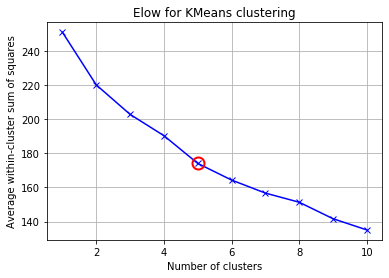

KindScore.ipynb:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "outputs": [],


In [3]:
data, model = ks.KindScoreModel(df,"Problem","score")

In [80]:
problemList =  []

### file wav
# problemList.append(sr.FileRecognition("/Users/fluke/Documents/RE/RE_Project/data/sound/01.wav",15))
# problemList.append(sr.FileRecognition("/Users/fluke/Documents/RE/RE_Project/data/sound/02.wav",15))
# problemList.append(sr.FileRecognition("C:/Users/Pack.Apichart/Desktop/Re_project/Cluster_speech_two/data/sound/02.wav",15))
# problemList.append(sr.FileRecognition("C:/Users/Pack.Apichart/Desktop/Re_project/Cluster_speech_two/data/sound/03.wav",15))
# problemList.append(sr.FileRecognition("C:/Users/Pack.Apichart/Desktop/Re_project/Cluster_speech_two/data/sound/04.wav",15))

### said problem
# problemList.append(sr.SpeechRecognition("speech"))

problemList.append("ถ้าคิวรอเยอะก็จะไม่กิน")
problemList.append("ปัญหาอหกดฟหกดฟหดอ้ย")
problemList.append("ปัญหาอหasfsadt4w5e sadfดอ้ย")
problemList.append("ไม่มีอาหารที่อยากกิน")
problemList.append("ไม่อยากต่อคิว")
# ปัญหาด้านกลิ่นด้าน

### file wav V2
### Step one : call SpeechRecognition("file") 
### Step two : input path file [only type String]
### Step tree :input second to recognitions [only type Integer]
# problemList.append(sr.SpeechRecognition("file"))

# x = sr.problem_CSV(pd.read_csv("data/dataReV6987.csv"), "Problem")
# x

### Weight score new problem in same cluster and wirte file csv

In [81]:
data

,Problem,score,cluster
0,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,2
1,ไม่มีอะไรน่ากิน,3.0,2
2,ถ้าคิวยาวก็ไม่ซื้อ,8.6,2
3,ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น,7.8,2
4,ถ้าแถวยาวมากก็จะขี้เกียจรอ,8.0,2
...,...,...,...
70,ก็ปัญหาจากโรงอาหารคณะไอทีน้าก็อย่างที่เจอก็คือ...,7.8,2
71,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,2
72,คนเยอะขี้เกียจต่อคิว,8.2,0
73,ไม่อยากต่อคิว,8.0,2


In [82]:
# data.loc[data["cluster"]== 0]

In [83]:
# data.loc[data["cluster"]== 1]

In [84]:
# data.loc[data["cluster"]== 2]

In [85]:
# data.loc[data["cluster"]== 3]

In [86]:
# data.loc[data["cluster"]== 4]


<hr size="3" />

<h1> Weigth The importance of the problem by similarity in same cluster problem</h1>

### conditions 1
* similarity > 0.7  in cluster |

### conditions 2
* similarity > 0.7  in nor cluster|

### conditions 3
* similarity < 0.7   write problem not match |

### Tips use the  ks.Weightscore
### ks.Weightscore(a, b, c, d, e)
<label>a = Path want to save Problem matching in dataset</label><br>
<label>b = List new problem</label><br>
<label>c = dataset | it must has featue cluster</label><br>
<label>d = model | after train in kindscore algorithm</label><br>
<label>e Path want to savePath Problem not matching in dataset</label><br>

In [87]:
# ks.Weightscore("data/dataReV656",problemList,data,model,"Problem","score")
dataset, cluster_newProblem = ks.Weightscore("data/dataReVXXX",problemList,data,model,"data/dataNotmatt")

ถ้าคิวรอเยอะก็จะไม่กิน 8.0 1.0000000000000002 ถ้าคิวรอเยอะก็จะไม่กิน
state_similarity >= 0.7 || 1
ปัญหาอหกดฟหกดฟหดอ้ย 8.8 0.2529638999214011 โดนลัดคิว
state_similarity <= 0.7
ปัญหาอหasfsadt4w5e sadfดอ้ย 7.6 0.21612913300902495 อาจารย์สอนเกินเวลาไม่มีอาหารเหลือให้กิน
state_similarity <= 0.7
ไม่มีอาหารที่อยากกิน 3.8 0.9999999999999996 ไม่มีอาหารที่อยากกิน
state_similarity >= 0.7 || 1
ไม่อยากต่อคิว 8.0 0.9999999999999997 ไม่อยากต่อคิว
state_similarity >= 0.7 || 1


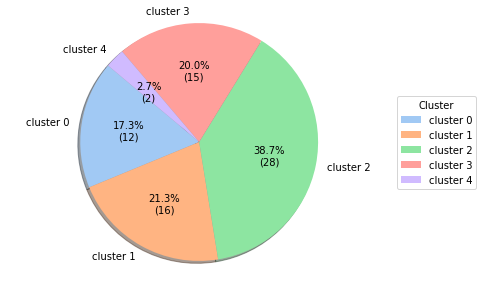

,Problem,score,cluster
0,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,2
1,ไม่มีอะไรน่ากิน,3.0,2
2,ถ้าคิวยาวก็ไม่ซื้อ,8.6,2
3,ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น,7.8,2
4,ถ้าแถวยาวมากก็จะขี้เกียจรอ,8.0,2
...,...,...,...
70,ก็ปัญหาจากโรงอาหารคณะไอทีน้าก็อย่างที่เจอก็คือ...,7.8,2
71,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,2
72,คนเยอะขี้เกียจต่อคิว,8.2,0
73,ไม่อยากต่อคิว,8.0,2


In [88]:
ks.pieplot(dataset)

dataset

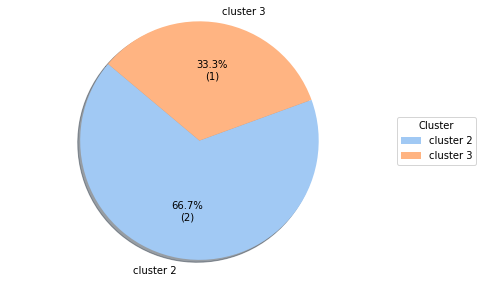

,Problem,score,cluster
0,ถ้าคิวรอเยอะก็จะไม่กิน,8.0,2
1,ไม่มีอาหารที่อยากกิน,3.8,3
2,ไม่อยากต่อคิว,8.0,2


In [89]:
ks.pieplot(cluster_newProblem)

cluster_newProblem

In [117]:
sizes = cluster_newProblem.groupby("cluster").count()['Problem']
labels = ["cluster"+str(I) for I in cluster_newProblem.groupby("cluster").count()['Problem'].index[:]]
sizes
# labels[0]
# pie_chart2 = pygal.Pie()
# pie_chart2.title = "Cluster"

# for i in range(len(sizes)):
#     print(labels[i] + " : " +str(sizes[i]))
#     pie_chart2.add(labels[i], sizes[i])
# pie_chart2.render_to_file("./02.svg")
# display(SVG(pie_chart2.render(disable_xml_declaration=True)))

cluster
2    2
3    1
Name: Problem, dtype: int64